In [24]:
import pandas as pd

df = pd.read_csv('gdc_download_20240201_205130.883037/0a72a23d-0e31-4060-8a99-c5da7e11c5ef/fa17239b-e5fb-4818-a4f7-f49d996d4a05.rna_seq.augmented_star_gene_counts.tsv', sep='\t')
df = df.reset_index()
df.columns = df.iloc[0]
df = df.drop(range(5))
df.index = df['gene_name'] + '_' + df['gene_id']
df = df.drop(columns=['gene_id', 'gene_name', 'gene_type'])

s = df.stack()
s.index = ['_'.join(map(str, idx)) for idx in s.index]
s = s[s.index.str.contains('^ALDOA_|^ANGPTL4_|^ANLN_|^BNC1_|^C20orf20_|^CA9_|^CDKN3_|^COL4A6_|^DCBLD1_|^ENO1_|^FAM83B_|^FOSL1_|^GNAI1_|^HIG2_|^KCTD11_|^KRT17_|^LDHA_|^MPRS17_|^P4HA1_|^PGAM1_|^PGK1_|^SDC1_|^SLC16A1_|^SLC2A1_|^TPI1_|^VEGFA_|^HLA-DQA1_|^HLA-DQA2_|^HLA-DRB5_|^CTLA4_|^PDCD1LG2_|^ICAM1_|^CD274_|^STAT1_|^IRF1_|^IFNG_|^GNLY_|^TBX21_|^CCL5_|^LAG3_|^CD247_|^ICOS_|^IL18RAP_|^CXCL9_|^CXCL10_|^HLA-DPB1_|^HLA-DPA1_|^HLA-DMB_|^HLA-DRA_|^HLA-DMA_|^CD80_|^HLA-DOA_|^CD4_')]

In [25]:
from ipywidgets import IntProgress
from IPython.display import display

import os
import pandas as pd

path = 'gdc_download_20240201_205130.883037'
folders = [entry.name for entry in os.scandir(path) if entry.is_dir()]
files = []

bar = IntProgress(min=0, max=len(folders))
display(bar)

for folder in folders:
    file = [entry.name for entry in os.scandir(path + '/' + folder) if entry.is_file() and entry.name[-4:] == '.tsv'][0]

    df = pd.read_csv(path + '/' + folder + '/' + file, sep='\t')
    df = df.reset_index()
    df.columns = df.iloc[0]
    df = df.drop(range(5))
    df.index = df['gene_name'] + '_' + df['gene_id']
    df = df.drop(columns=['gene_id', 'gene_name', 'gene_type'])

    s = df.stack()
    s.index = ['_'.join(map(str, idx)) for idx in s.index]
    s = s[s.index.str.contains('^ALDOA_|^ANGPTL4_|^ANLN_|^BNC1_|^C20orf20_|^CA9_|^CDKN3_|^COL4A6_|^DCBLD1_|^ENO1_|^FAM83B_|^FOSL1_|^GNAI1_|^HIG2_|^KCTD11_|^KRT17_|^LDHA_|^MPRS17_|^P4HA1_|^PGAM1_|^PGK1_|^SDC1_|^SLC16A1_|^SLC2A1_|^TPI1_|^VEGFA_|^HLA-DQA1_|^HLA-DQA2_|^HLA-DRB5_|^CTLA4_|^PDCD1LG2_|^ICAM1_|^CD274_|^STAT1_|^IRF1_|^IFNG_|^GNLY_|^TBX21_|^CCL5_|^LAG3_|^CD247_|^ICOS_|^IL18RAP_|^CXCL9_|^CXCL10_|^HLA-DPB1_|^HLA-DPA1_|^HLA-DMB_|^HLA-DRA_|^HLA-DMA_|^CD80_|^HLA-DOA_|^CD4_')]

    files.append(s)

    bar.value += 1

df = pd.concat(files, axis=1).T
df['file_id'] = folders

IntProgress(value=0, max=565)

In [39]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('rnaseq2.tsv', sep='\t')
#df.to_csv('rnaseq2.tsv', sep='\t', index=False)

meta = json.load(open('metadata.cart.2024-02-01.json'))
file_id = []
case_id = []
for i in meta:
    file_id.append(i['file_id'])
    case_id.append(i['associated_entities'][0]['case_id'])

df = pd.merge(df, pd.DataFrame({'case_id': case_id, 'file_id': file_id}), on='file_id', how='left')
df = pd.merge(df, pd.read_csv('output.csv'), on='case_id', how='left')

X = df.drop(columns=['file_id', 'case_id', 'vital_status']).apply(pd.to_numeric)
y = df['vital_status'].map({'Alive': True, 'Dead': False})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
df

,CD4_ENSG00000010610.10_unstranded,CD4_ENSG00000010610.10_stranded_first,CD4_ENSG00000010610.10_stranded_second,CD4_ENSG00000010610.10_tpm_unstranded,CD4_ENSG00000010610.10_fpkm_unstranded,CD4_ENSG00000010610.10_fpkm_uq_unstranded,ANLN_ENSG00000011426.11_unstranded,ANLN_ENSG00000011426.11_stranded_first,ANLN_ENSG00000011426.11_stranded_second,ANLN_ENSG00000011426.11_tpm_unstranded,...,HLA-DMB_ENSG00000242574.9_fpkm_uq_unstranded,CCL5_ENSG00000271503.6_unstranded,CCL5_ENSG00000271503.6_stranded_first,CCL5_ENSG00000271503.6_stranded_second,CCL5_ENSG00000271503.6_tpm_unstranded,CCL5_ENSG00000271503.6_fpkm_unstranded,CCL5_ENSG00000271503.6_fpkm_uq_unstranded,file_id,case_id,vital_status
0,131,64,67,2.2622,0.7230,0.7704,1947,1002,959,25.5484,...,1.0689,32,13,19,1.6799,0.5369,0.5721,40d8ec31-60e2-4c0b-ae9b-c5910e2cebba,a0b136fb-3a0a-4411-8907-4ca775c7d04e,Dead
1,2858,1399,1459,45.4201,14.4999,16.1720,2567,1304,1290,30.9997,...,18.6755,7843,3902,3941,378.9185,120.9657,134.9151,c3afcb4c-394b-4876-aa92-00500e9bf740,8b9e81da-ea22-4f6a-bdb1-281b0ec8a451,Dead
2,1258,613,645,16.2560,4.6646,5.3111,10119,5272,5333,99.3607,...,1.7558,370,200,170,14.5349,4.1707,4.7488,cf40df1f-3037-405b-b652-ff6a6f9d9085,45a10908-19e6-421a-8903-1440bfa57c9d,Alive
3,7041,3497,3546,66.6658,22.0262,32.6748,3128,1685,1576,22.5051,...,5.5058,2489,1252,1237,71.6425,23.6705,35.1140,7ed2198a-102d-42e2-8cf0-d8dfbdf34632,7e0575ce-670b-4035-8a90-4d35279707b2,Alive
4,1624,789,835,14.6751,5.0749,6.1666,3377,1742,1700,23.1884,...,5.0339,4841,2378,2463,132.9866,45.9890,55.8821,55ffd417-0e61-4fe5-9ba4-54ae15c8330a,a091822c-447a-49a5-8c20-e329df79599c,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,751,379,373,10.6028,3.2800,3.5951,5605,2946,2797,60.1313,...,1.4092,531,252,279,22.7904,7.0504,7.7275,f8b3eb55-0a76-4f8c-bf8c-f99767c352fd,765cc306-bdae-4caf-ad1e-35b8fe95c220,Alive
561,4111,2042,2069,59.8407,17.0283,19.8464,4349,2244,2270,48.1043,...,6.1330,4936,2435,2501,218.4247,62.1549,72.4414,7343f7e6-bc2a-417a-b8e3-465d12ac9939,aa34f900-b2e4-4276-9d28-807ad11444ac,Dead
562,2356,1123,1235,26.2353,6.8780,7.9787,8335,4349,4253,70.5281,...,2.9339,4829,2383,2446,163.4730,42.8568,49.7154,0398eb84-be87-4906-9e22-cb94494b54f6,d82e6c52-9ea4-4f60-989c-cf95d464fd6f,Alive
563,2669,1316,1355,32.4735,9.7468,10.0568,3142,1608,1575,29.0491,...,6.5251,1890,940,950,69.9069,20.9823,21.6497,cfde3042-a7a5-4931-88ae-d4f23dcee41c,9dd8b7cc-d094-474b-9573-cbff4ab233c8,Alive


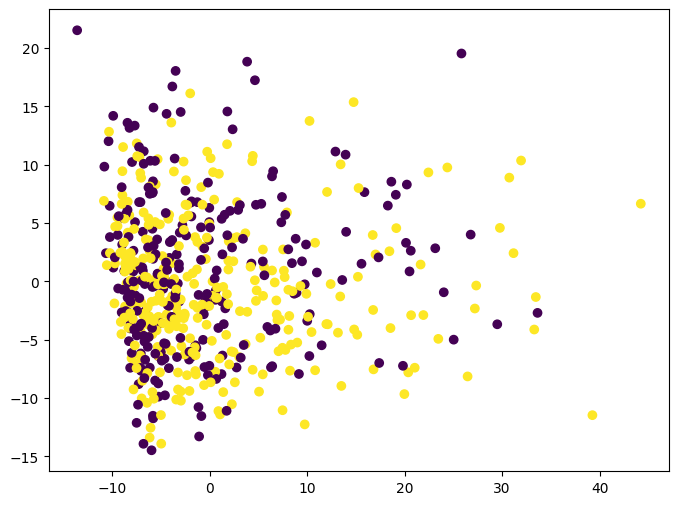

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

principal_components = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=y, cmap='viridis')
plt.show()